In [29]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pd.options.display.max_rows = 100

%matplotlib inline


In [30]:
# train and test data files are provided as separate csv files

train = pd.read_csv('../data/train_cleaned.csv')
test = pd.read_csv('../data/test_cleaned.csv')

In [31]:
test.isnull().sum()

ms_subclass        0
lot_frontage       0
lot_area           0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
mas_vnr_area       0
bsmtfin_sf_1       0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     0
bsmt_half_bath     0
full_bath          0
half_bath          0
bedroom_abvgr      0
kitchen_abvgr      0
totrms_abvgrd      0
fireplaces         0
garage_yr_blt      0
garage_cars        0
garage_area        0
wood_deck_sf       0
open_porch_sf      0
enclosed_porch     0
3ssn_porch         0
screen_porch       0
pool_area          0
misc_val           0
exter_qual_1       0
exter_qual_2       0
exter_qual_3       0
exter_qual_4       0
exter_cond_0       0
exter_cond_1       0
exter_cond_2       0
exter_cond_3       0
exter_cond_4       0
heating_qc_1       0
heating_qc_2       0
heating_qc_3       0
heating_qc_4       0
kitchen_qual_

In [32]:
train.shape

(2026, 78)

In [33]:
train.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,garage_qual_0,garage_qual_1,garage_qual_2,garage_qual_3,garage_qual_4,garage_cond_0,garage_cond_1,garage_cond_2,garage_cond_3,garage_cond_4
0,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,...,0,0,1,0,0,0,0,1,0,0
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,...,0,0,1,0,0,0,0,1,0,0
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0


In [35]:
# Assign X and y

X = train.drop(columns=['saleprice'])

y = train['saleprice']

In [36]:
X.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,garage_qual_0,garage_qual_1,garage_qual_2,garage_qual_3,garage_qual_4,garage_cond_0,garage_cond_1,garage_cond_2,garage_cond_3,garage_cond_4
0,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,...,0,0,1,0,0,0,0,1,0,0
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,...,0,0,1,0,0,0,0,1,0,0
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0


In [37]:
X.shape

(2026, 77)

In [38]:
y.shape

(2026,)

In [39]:
# performing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.44, random_state = 42)

In [40]:
# Check X train shape

X_train.shape

(1134, 77)

In [41]:
# Check X test shape
X_test.shape

(892, 77)

In [42]:
# Instantiate model

lr = LinearRegression()

In [43]:
# Fit model
lr.fit(X_train, y_train)

print(f'Training R-squared is: {lr.score(X_train, y_train)}')
print(f'Testing R-squared is: {lr.score(X_test, y_test)}')

Training R-squared is: 0.917054665569308
Testing R-squared is: 0.8998547806427895


In [44]:
y_preds = lr.predict(X_test)

In [45]:
residuals = y_test - y_preds

In [46]:
np.sqrt(mean_squared_error(y_test, y_preds))

23839.855538245065

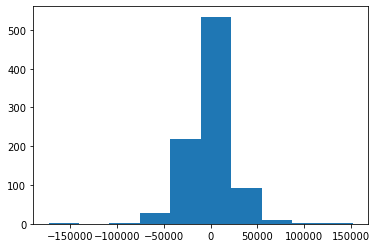

In [47]:
plt.hist(residuals);

In [48]:
# Function to print metrics, code source: Medium
def model_metrics(target, predictions):
    print(f'The R-squared of the model is: \
    {round(r2_score(target, predictions), 4)}.')
    # returns MAE
    print(f'The mean absolute error (MAE) of the model is: {round(mean_absolute_error(target, predictions), 4)}.')
    # returns MSE
    print(f'The mean squared error (MSE) of the model is : {round(mean_squared_error(target, predictions), 4)}.')
    # returns RMSE
    print(f'The root mean squared error (RMSE) of the model is: {round(np.sqrt(mean_squared_error(target, predictions)), 4)}.')
    

In [49]:
model_metrics(y_test, y_preds)

The R-squared of the model is:     0.8999.
The mean absolute error (MAE) of the model is: 16741.6451.
The mean squared error (MSE) of the model is : 568338712.0844.
The root mean squared error (RMSE) of the model is: 23839.8555.


In [50]:
lr_coef = pd.DataFrame(lr.coef_, index=X.columns)
lr_coef

,0
ms_subclass,-5.504103e+01
lot_frontage,6.696113e+01
lot_area,1.330873e+00
overall_qual,9.124765e+03
overall_cond,5.117422e+03
year_built,3.896687e+02
year_remod/add,1.357842e+02
mas_vnr_area,1.902919e+01
bsmtfin_sf_1,1.865593e+01
bsmtfin_sf_2,4.186978e+00


In [51]:
y_test.shape

(892,)

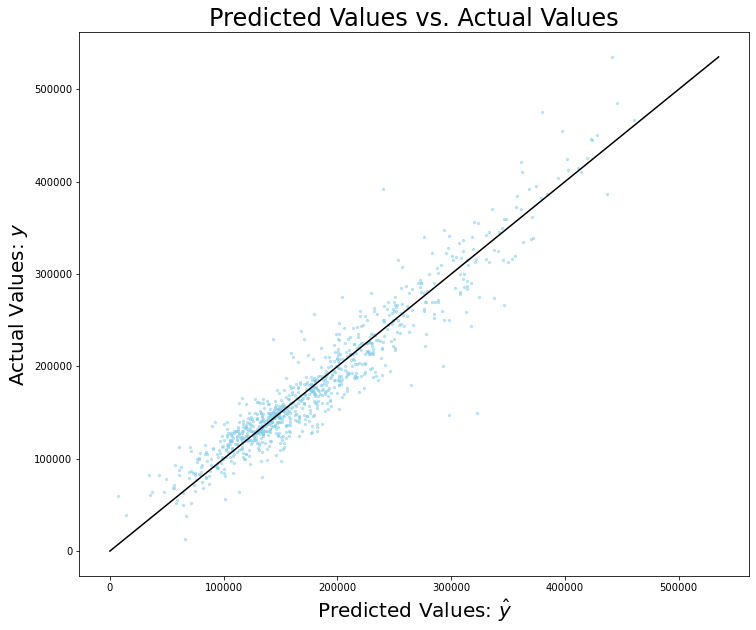

In [53]:
# Visualize prediction

# Plot the model
plt.figure(figsize=(12,10))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_preds, y_test, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y_test)],
         [0, np.max(y_test)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);